In [1]:
""


from acevedo_clss_and_fcns import * 
device = 'cpu'
if torch.cuda.is_available():
    torch.cuda.init()
    if torch.cuda.is_initialized():
        device = 'cuda:0'
#device = torch.device(device)
print(f"{device = }")
#loader_path = "./results/dataloaders/loader_Concen_plus_Fluxes.pt"
#loader = torch.load(loader_path)
#loader_validation = loader.get_validation_loader()
#loader_train = loader.get_train_loader()
#all_graphs_weights_df.to_parquet('./results/data/non_filtered_graphs_weights_from_explainer.parquet.gzip', compression = 'gzip')

all_graphs_weights_df = pd.read_parquet('./results/data/data_for_R/Masked_graphs_weights_from_explainer.parquet.gzip')

print(f"{all_graphs_weights_df.shape=}")

/DeepenData/.miniconda/envs/geo/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


device = 'cuda:0'
all_graphs_weights_df.shape=(38938, 4921)


((390, 4921), (38938,))

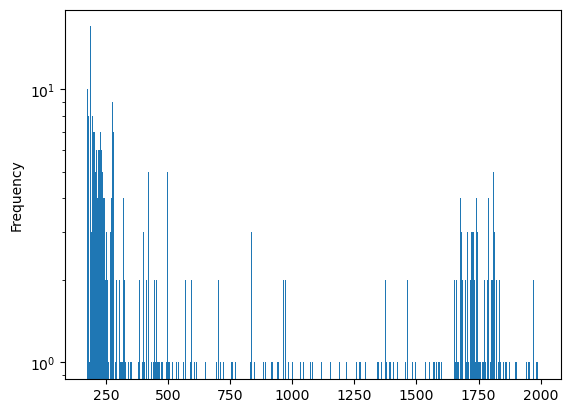

In [2]:
edge_mask = all_graphs_weights_df.sum(axis=1) > np.percentile(all_graphs_weights_df.sum(axis=1), 99)


filtered_graph_weights_df = all_graphs_weights_df.loc[  edge_mask, :]

filtered_graph_weights_df.sum(axis=1).plot.hist(logy = True, bins=500)
filtered_graph_weights_df.shape, edge_mask.shape

<AxesSubplot:ylabel='Frequency'>

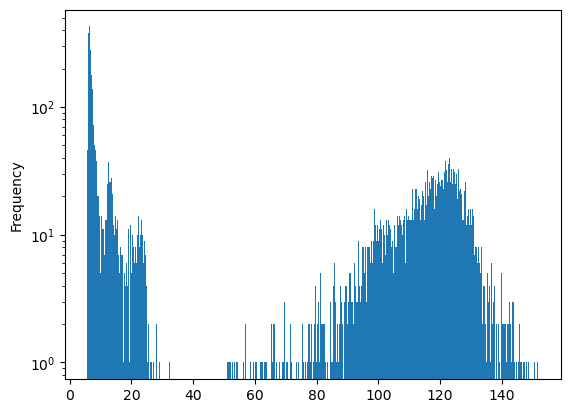

In [3]:
filtered_graph_weights_df.sum(axis=0).plot.hist(logy = True, bins=500)


In [4]:
#loader_path = "./results/dataloaders/MASKED_loader_Concen_plus_Fluxes.pt"
#loader = torch.load(loader_path)
#loader_validation = loader.get_validation_loader()
#loader_train = loader.get_train_loader()
#train_labels = []
#for graph in tqdm.tqdm(loader_train.dataset):
#    train_labels.append(graph.y.cpu().item())
#train_labels.__len__()

train_labels = pd.read_csv("./results/data/data_for_R/Mask_train_labels.csv").drop('Unnamed: 0', axis=1)['0']

filtered_graph_weights = filtered_graph_weights_df.transpose() #.columns = train_labels
filtered_graph_weights["Label"] = list(train_labels)

filtered_graph_weights.reset_index(drop=True, inplace=True)
filtered_graph_weights.columns = [str(col) for col in filtered_graph_weights.columns]
#filtered_graph_weights.to_parquet('./results/data/filtered_graph_weights.parquet.gzip', compression = 'gzip')
filtered_graph_weights

,106,492,494,515,800,961,967,968,971,972,...,36895,37115,37182,37264,38209,38299,38375,38393,38616,Label
0,0.020288,0.015493,0.014806,0.012556,0.014797,0.011185,0.016507,0.019032,0.015720,0.014451,...,0.013845,0.013803,0.013664,0.013562,0.005626,0.013971,0.011257,0.013693,0.012946,PKU
1,0.022236,0.013904,0.013973,0.012029,0.015416,0.022311,0.015748,0.016028,0.014184,0.013925,...,0.017616,0.014599,0.014638,0.014287,0.021525,0.012698,0.013848,0.013896,0.013057,PKU
2,0.014698,0.598420,0.027376,0.058028,0.704563,0.022189,0.510341,0.600992,0.059129,0.346654,...,0.169333,0.134206,0.131903,0.022494,0.284571,0.213801,0.014089,0.571623,0.128551,Control
3,0.060151,0.646944,0.032385,0.055175,0.020701,0.210963,0.476268,0.573552,0.209306,0.276012,...,0.059931,0.136004,0.134537,0.020540,0.134394,0.401491,0.070943,0.737001,0.081019,Control
4,0.020108,0.636886,0.054406,0.058920,0.691885,0.022166,0.547528,0.584328,0.374235,0.359760,...,0.076248,0.156610,0.163483,0.540259,0.141861,0.087005,0.014137,0.671326,0.433057,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4916,0.015720,0.833043,0.099430,0.064673,0.859332,0.012887,0.569930,0.727533,0.181197,0.328132,...,0.030502,0.010138,0.010012,0.061793,0.415313,0.052055,0.013999,0.924631,0.263153,PKU
4917,0.007781,0.014837,0.013904,0.012385,0.014759,0.006713,0.015633,0.016497,0.015240,0.014112,...,0.011390,0.013886,0.013866,0.014017,0.009820,0.011224,0.834548,0.014235,0.013353,PKU
4918,0.013769,0.013773,0.013232,0.010224,0.015337,0.013960,0.016372,0.016429,0.016451,0.013823,...,0.019043,0.016845,0.016882,0.018599,0.008003,0.012813,0.013696,0.013834,0.013235,Control
4919,0.113938,0.870093,0.037077,0.065683,0.974725,0.056127,0.598694,0.718904,0.395495,0.445927,...,0.023387,0.012416,0.012384,0.020779,0.097126,0.007125,0.061520,0.857375,0.015152,Control


In [5]:
PYG_graph = torch.load("./results/graphs_from_PYG_and_NX/PYG_graph_Concen_plus_Fluxes.pt")


NX_graph  = nx.read_gpickle("./results/graphs_from_PYG_and_NX/grafo_nx_Concen_plus_Fluxes.gpickle")

In [6]:
edge_0_node_idxs =  PYG_graph.edge_index[0,:]
edge_1_node_idxs =  PYG_graph.edge_index[1,:]
edge_0_nodes     = [list(NX_graph.nodes)[i] for i in  edge_0_node_idxs]
edge_1_nodes     = [list(NX_graph.nodes)[i] for i in  edge_1_node_idxs]

edges_df = pd.DataFrame({'node1': edge_0_nodes, 'node2':edge_1_nodes})



edges_node_names_explainer_subgraphs = pd.concat([edges_df, all_graphs_weights_df], axis=1).loc[edge_mask,:]



edges_node_names_explainer_subgraphs.to_csv("./results/data/data_for_R/Masked_edges_node_names_explainer_subgraphs.csv")
pd.concat([edges_df, all_graphs_weights_df], axis=1).to_parquet("./results/data/data_for_R/Masked_ALL_edges_node_names_explainer_subgraphs.parquet.gzip", compression='gzip')